In [1]:
import numpy as np
import random
import math
import scipy.io as sio
import imageio

import time 
import timeit

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [2]:
data = sio.loadmat('team_4.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Jan 29 16:45:05 2020',
 '__version__': '1.0',
 '__globals__': [],
 'training_idx': array([[array([[23, 44, 10, 40, 31, 35, 37, 29, 42, 17, 26, 32, 18,  3,  7]],
       dtype=uint8),
         array([[65, 83, 20, 28, 44, 42, 71, 14,  7, 22, 85, 84,  1, 38, 52]],
       dtype=uint8),
         array([[20,  3, 41, 43, 51,  5, 55, 13,  8, 21,  1, 11, 72, 19, 12]],
       dtype=uint8),
         array([[ 76, 118, 169,  26, 155,  38, 201,  95, 179, 153, 218, 175, 156,
         135, 220]], dtype=uint8),
         array([[ 6, 37, 30, 19, 18, 31, 25, 21, 20, 14,  2, 17,  9, 27, 16]],
       dtype=uint8),
         array([[38, 56, 11, 16, 14, 20,  4, 42,  5, 26, 39, 25, 55, 52, 47]],
       dtype=uint8),
         array([[17,  9, 11, 31, 24,  3,  2, 22, 20,  8, 13, 27, 21, 12, 10]],
       dtype=uint8),
         array([[38, 44, 31, 16, 42, 45, 48, 30, 40, 23,  3, 37, 53, 15, 52]],
       dtype=uint8),
         array([[24, 21, 35, 

In [3]:
for key, _ in data.items():
    print(key)

__header__
__version__
__globals__
training_idx
testing_idx
descriptors_training
descriptors_testing
random_selected_descriptors


In [4]:
x = np.matrix.transpose(data['descriptors_training'][0][1])
x.shape

(3017, 128)

In [5]:
training_idx = data['training_idx']
training_idx

array([[array([[23, 44, 10, 40, 31, 35, 37, 29, 42, 17, 26, 32, 18,  3,  7]],
      dtype=uint8),
        array([[65, 83, 20, 28, 44, 42, 71, 14,  7, 22, 85, 84,  1, 38, 52]],
      dtype=uint8),
        array([[20,  3, 41, 43, 51,  5, 55, 13,  8, 21,  1, 11, 72, 19, 12]],
      dtype=uint8),
        array([[ 76, 118, 169,  26, 155,  38, 201,  95, 179, 153, 218, 175, 156,
        135, 220]], dtype=uint8),
        array([[ 6, 37, 30, 19, 18, 31, 25, 21, 20, 14,  2, 17,  9, 27, 16]],
      dtype=uint8),
        array([[38, 56, 11, 16, 14, 20,  4, 42,  5, 26, 39, 25, 55, 52, 47]],
      dtype=uint8),
        array([[17,  9, 11, 31, 24,  3,  2, 22, 20,  8, 13, 27, 21, 12, 10]],
      dtype=uint8),
        array([[38, 44, 31, 16, 42, 45, 48, 30, 40, 23,  3, 37, 53, 15, 52]],
      dtype=uint8),
        array([[24, 21, 35, 19, 28, 34,  7,  1, 27, 32, 17, 13, 36, 20,  3]],
      dtype=uint8),
        array([[38, 42, 36, 26,  6, 35, 39, 41, 55, 29, 34, 58, 33, 40, 43]],
      dtype=uint8)]], d

In [6]:
training_index = []

for i, ele in enumerate(training_idx[0]):
    training_index.append(ele.flatten())
    
training_index = np.asarray(training_index)

In [7]:
training_index

array([[ 23,  44,  10,  40,  31,  35,  37,  29,  42,  17,  26,  32,  18,
          3,   7],
       [ 65,  83,  20,  28,  44,  42,  71,  14,   7,  22,  85,  84,   1,
         38,  52],
       [ 20,   3,  41,  43,  51,   5,  55,  13,   8,  21,   1,  11,  72,
         19,  12],
       [ 76, 118, 169,  26, 155,  38, 201,  95, 179, 153, 218, 175, 156,
        135, 220],
       [  6,  37,  30,  19,  18,  31,  25,  21,  20,  14,   2,  17,   9,
         27,  16],
       [ 38,  56,  11,  16,  14,  20,   4,  42,   5,  26,  39,  25,  55,
         52,  47],
       [ 17,   9,  11,  31,  24,   3,   2,  22,  20,   8,  13,  27,  21,
         12,  10],
       [ 38,  44,  31,  16,  42,  45,  48,  30,  40,  23,   3,  37,  53,
         15,  52],
       [ 24,  21,  35,  19,  28,  34,   7,   1,  27,  32,  17,  13,  36,
         20,   3],
       [ 38,  42,  36,  26,   6,  35,  39,  41,  55,  29,  34,  58,  33,
         40,  43]], dtype=uint8)

In [8]:
training_index[0][2]

10

In [9]:
testing_idx = data['testing_idx']
testing_index = []

for i, ele in enumerate(testing_idx[0]):
    testing_index.append(ele.flatten())
    
testing_index = np.asarray(testing_index)

In [10]:
descriptors_training = data['descriptors_training']
descriptors_testing = data['descriptors_testing']

descriptors_training_fixed = []
descriptors_testing_fixed = []

for i in range(10):
    for j in range(15):        
        for m in range(128):
            # descriptors_training_fixed[k] = np.matrix.transpose(descriptors_training[0][i][j]).shape
            descriptors_training_fixed.append(descriptors_training[i][j][m])
            descriptors_testing_fixed.append(descriptors_testing[i][j][m])

descriptors_training_fixed = np.asarray(descriptors_training_fixed) 
descriptors_testing_fixed = np.asarray(descriptors_testing_fixed)

print('Training')
print(descriptors_training_fixed)
print('\n')
print('Testing')
print(descriptors_testing_fixed)

Training
[array([156, 255, 255, ...,   0,   0,   0], dtype=uint8)
 array([76,  9,  2, ...,  0,  0,  0], dtype=uint8)
 array([160,   0,   0, ...,   0,   0,   0], dtype=uint8) ...
 array([ 35, 101,   5, ...,  11,  27,  51], dtype=uint8)
 array([ 6, 28,  3, ...,  1,  8, 40], dtype=uint8)
 array([ 1,  8, 10, ...,  3,  5,  9], dtype=uint8)]


Testing
[array([ 3,  0,  0, ..., 62, 58, 58], dtype=uint8)
 array([ 0,  0,  1, ..., 34, 14, 21], dtype=uint8)
 array([ 3, 10,  2, ..., 33, 19, 43], dtype=uint8) ...
 array([ 0, 10,  0, ...,  1, 15, 14], dtype=uint8)
 array([ 0, 11,  0, ...,  0,  0,  0], dtype=uint8)
 array([0, 9, 0, ..., 0, 0, 0], dtype=uint8)]


In [11]:
random_selected_descriptors = data['random_selected_descriptors']
random_selected_descriptors_array = np.matrix.transpose(random_selected_descriptors)

In [12]:
def convNum(number):
    number_of_digits = len(str(number))
    
    strNum = ""
    
    for i in range(4-number_of_digits):
        strNum += '0'
        
    return strNum + str(number)

In [13]:
training_images = {
    'tick': [], 
    'trilobite': [], 
    'umbrella': [], 
    'watch': [], 
    'water_lilly': [], 
    'wheelchair': [], 
    'wild_cat': [], 
    'windsor_chair': [], 
    'wrench': [], 
    'yin_yang': []
}

counter = 0

for key, _ in training_images.items():
    arr = training_index[counter]
    for i in arr:
        training_images[key].append(imageio.imread(key+'/image_'+ convNum(i) + '.jpg'))
            
    counter += 1

In [14]:
len(training_images['tick'])

15

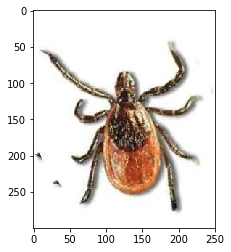

In [23]:
plt.imshow(testing_images['tick'][5])

In [16]:
testing_images = {
    'tick': [], 
    'trilobite': [], 
    'umbrella': [], 
    'watch': [], 
    'water_lilly': [], 
    'wheelchair': [], 
    'wild_cat': [], 
    'windsor_chair': [], 
    'wrench': [], 
    'yin_yang': []
}

counter = 0

for key, _ in testing_images.items():
    arr = testing_index[counter]
    for i in arr:
        testing_images[key].append(imageio.imread(key+'/image_'+ convNum(i) + '.jpg'))
            
    counter += 1

In [16]:
random_selected_descriptors_array.shape

(100000, 128)

In [19]:
random_selected_descriptors_array

array([[255.,   9.,   0., ...,   1.,   2.,   0.],
       [255.,   2.,   0., ...,   1.,   2.,   5.],
       [255.,   3.,   0., ...,   0.,   0.,   0.],
       ...,
       [  2.,   7.,  18., ..., 208.,   7.,   9.],
       [  4.,   7.,   4., ..., 101.,   1.,   2.],
       [  2.,   3.,   1., ...,   6.,   6.,   8.]], dtype=float32)

In [32]:
def kmeans(data, K):
    
    mean_idx=[]

    number_of_elements = K
    min_random_value = 1
    max_random_value = 100000

    random.seed(42)
    
    for i in range(number_of_elements):
        r= random.randint(min_random_value, max_random_value)
        if r not in mean_idx: mean_idx.append(r)
            
    centroids = []
    
    for idx in mean_idx:
        centroids.append(data[idx])    
    
    centroids_changed = True
    labels_changed = True
    
    # Conditionals
    # centroids - old_centroids = 0 
    # labels - old_labels = 0
    
    m = 0
    
    labels = []
        
    while centroids_changed and labels_changed:
    
        m += 1
        
        old_labels = labels[:]
        old_centroids = centroids[:]
    
        labels = []
    
        for d in data:
            min_distance = np.linalg.norm(d-centroids[0])
            label = 0

            for i, center in enumerate(centroids):
                dist = np.linalg.norm(d-center)
                if dist < min_distance:
                    min_distance = dist
                    label = i

            labels.append(label)

        for i, center in enumerate(centroids):
            accumulated_sum = np.zeros((1, 128))
            number_of_data_points = 0
            for j, label in enumerate(labels):
                if label == i:
                    accumulated_sum += data[j]
                    number_of_data_points += 1

            centroids[i] = accumulated_sum/number_of_data_points
            
        centroids_changed = not np.allclose(np.asarray(centroids), np.asarray(old_centroids))
        labels_changed = not np.array_equal(np.asarray(labels), np.asarray(old_labels))
        
    return centroids

In [21]:
def extractDescriptors(descriptor):
    image_des = []
    
    for single in descriptor:
        unwrapped = []

        for e1 in single.tolist():
            unwrapped.append(e1)

        image_des.append(unwrapped)
        
    return np.matrix.transpose(np.asarray(image_des))

In [22]:
dictionary = kmeans(random_selected_descriptors_array, 3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65


In [23]:
def bagOfWords(image_descriptors, centroids):
    
    labels = []
    
    for descriptor in image_descriptors:
        
        min_length = np.linalg.norm(descriptor-centroids[0])
        label = 0
        
        for i, center in enumerate(centroids):
            dist = np.linalg.norm(descriptor-center)
            if dist < min_length:
                min_length = dist
                label = i
                
        labels.append(label)
            
    bagOfWords = np.zeros(len(centroids))
    
    for ele in labels:
        bagOfWords[ele] += 1
    
    return bagOfWords    

In [24]:
freq_counts = bagOfWords(extractDescriptors(descriptors_training_fixed[:128]), dictionary)

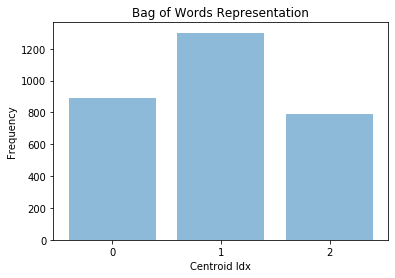

In [25]:
objects = ('0', '1', '2')
y_pos = np.arange(len(objects))

plt.bar(y_pos, freq_counts, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.xlabel('Centroid Idx')
plt.title('Bag of Words Representation')

plt.show()

In [26]:
def bagOfWordsHist(descriptor_list, dick):
    descriptors_hist = []

    for i in range(10):
        class_descriptors = []
        k = 0
        for j in range(int(descriptor_list.shape[0]/10)):
            class_descriptors.append(bagOfWords(extractDescriptors(descriptor_list[k:128+k]), dick))
            k += 128
        descriptors_hist.append(class_descriptors)
        
    return descriptors_hist

In [27]:
descriptors_training_hist = bagOfWordsHist(descriptors_training_fixed, dictionary)

In [28]:
descriptors_testing_hist = bagOfWordsHist(descriptors_testing_fixed, dictionary)

In [33]:
times_rec = np.zeros(50)

K_array = np.arange(10, 500, 10)
J = 1
dictionary_list = []

for k in K_array:
    accumulated_time = 0
    print(k)
    for i in range(J):
        start = time.time()
        dictionary = kmeans(random_selected_descriptors_array, k)
        bagOfWordsHist(descriptors_training_fixed[:128], dictionary)
        end = time.time()
        accumulated_time += end-start
        if i == 0: dictionary_list.append(dictionary)
    
    times_rec[k] = accumulated_time/J
    k += 1

10


C:\Users\calor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


20
30


KeyboardInterrupt: 

In [ ]:
import csv

out = csv.writer(open("kmeans_codebook.csv","w"), delimiter=',',quoting=csv.QUOTE_ALL)
out.writerow(dictionary_list)